## 2.2 필기체를 구분하는 분류 ANN 구현
분류 ANN은 클래스가 둘 이상인 데이터를 분류하는 인공지능 방법입니다.

### 2.2.1 분류 ANN을 위한 인공지능 모델 구현
여기서는 분류 ANN의 구현과 관련하여 1단계, 2단계, 3단계를 다룹니다. 

1. 케라스 패키지로부터 2가지 모듈을 불러옵니다.

In [1]:
from keras import layers, models

2. ANN 모델을 분산 방식으로 구현합니다. 

In [2]:
def ANN_models_func(Nin, Nh, Nout):
    x = layers.Input(shape=(Nin,))
    h = layers.Activation('relu')(layers.Dense(Nh)(x))
    y = layers.Activation('softmax')(layers.Dense(Nout)(h))
    model = models.Model(x, y)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

3. ANN의 모델을 연쇄 방식으로 구현하는 방법을 알아봅니다

In [3]:
def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    model.add(layers.Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    return model

4. 구현할 ANN 코드의 재사용성을 높이기 위해 객체지향 방식으로 구현할 수도 있습니다.

In [4]:
class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = softmax(output(h))

        super().__init__(x, y)
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])

5. 앞에서는 각 계층을 별도로 정의했는데 연쇄Sequential 방식을 사용하면 더 편리하게 모델링할 수 있습니다.

In [5]:
class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])

### 2.2.2 분류 ANN에 사용할 데이터 불러오기

6. 인공지능으로 처리할 데이터를 불러오는 방법을 알아봅니다. 

In [6]:
import numpy as np
from keras import datasets  # mnist
from keras.utils import np_utils  # to_categorical


def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, H, W = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

### 2.2.3 분류 ANN 학습 결과 그래프 구현

7. ANN 학습 결과를 분석하는 방법을 알아봅니다.

- 그래프를 그리는 라이브러리인 pyplot를 matplotlib 패키지로 부터 불러와서 plt로 이름을 재정의 합니다. 

In [8]:
import matplotlib.pyplot as plt

- 손실을 그리는 함수는 다음과 같습니다.

In [16]:
# from keraspp.skeras import plot_loss
def plot_loss(history, title=None):
    if not isinstance(history, dict):
        history = history.history    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training', 'Validation'], loc=0)

- 다음은 정확도를 그리는 함수입니다. 

In [17]:
# from keraspp.skeras import plot_acc
def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history = history.history    
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'], loc=0)

### 2.2.4 분류 ANN 학습 및 성능 분석

8. ANN에 사용될 파라미터를 정의합니다. 

- ANN에 사용될 파라미터 4가지를 정의합니다. 

In [11]:
Nin = 784
Nh = 100
number_of_class = 10
Nout = number_of_class

- 모델의 인스턴스를 만들고 데이터도 불러옵니다. 

In [12]:
# model = ANN_models_func(Nin, Nh, Nout)
# model = ANN_seq_func(Nin, Nh, Nout)
# model = ANN_models_class(Nin, Nh, Nout)
model = ANN_seq_class(Nin, Nh, Nout)
(X_train, Y_train), (X_test, Y_test) = Data_func()

2021-09-23 17:43:53.247579: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-09-23 17:43:53.632230: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-09-23 17:43:53.632502: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.455GHz coreCount: 5 deviceMemorySize: 2.00GiB deviceMemoryBandwidth: 104.43GiB/s
2021-09-23 17:43:53.636211: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-09-23 17:43:53.703323: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-09-23 17:43:53.747754: I tensorflow/stream_executor

- 만들어진 인스턴스와 불러온 데이터를 이용해 모델을 학습하는 방법을 알아봅니다.

In [13]:
history = model.fit(X_train, Y_train, epochs=5, batch_size=100, validation_split=0.2)

2021-09-23 17:44:02.248997: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 376320000 exceeds 10% of free system memory.
2021-09-23 17:44:04.484273: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 376320000 exceeds 10% of free system memory.
2021-09-23 17:44:04.795776: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 301056000 exceeds 10% of free system memory.


Epoch 1/5


2021-09-23 17:44:05.239986: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


475/480 [============================>.] - ETA: 0s - loss: 0.3948 - accuracy: 0.8923

2021-09-23 17:44:08.152684: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 75264000 exceeds 10% of free system memory.


480/480 [==============================] - 3s 6ms/step - loss: 0.3934 - accuracy: 0.8926 - val_loss: 0.2252 - val_accuracy: 0.9359
Epoch 2/5
480/480 [==============================] - 2s 5ms/step - loss: 0.1904 - accuracy: 0.9450 - val_loss: 0.1658 - val_accuracy: 0.9524
Epoch 3/5
480/480 [==============================] - 2s 5ms/step - loss: 0.1420 - accuracy: 0.9593 - val_loss: 0.1383 - val_accuracy: 0.9608
Epoch 4/5
480/480 [==============================] - 2s 5ms/step - loss: 0.1127 - accuracy: 0.9672 - val_loss: 0.1240 - val_accuracy: 0.9639
Epoch 5/5
480/480 [==============================] - 2s 5ms/step - loss: 0.0927 - accuracy: 0.9727 - val_loss: 0.1148 - val_accuracy: 0.9668


- 학습이나 검증에 사용되지 않은 데이터(X_test, y_test)로 성능을 최종 평가한 결과를 살펴봅니다.

In [14]:
performace_test = model.evaluate(X_test, Y_test, batch_size=100)
print('Test Loss and Accuracy ->', performace_test)

 29/100 [=======>......................] - ETA: 0s - loss: 0.1400 - accuracy: 0.9566

2021-09-23 17:44:22.132498: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 31360000 exceeds 10% of free system memory.


100/100 [==============================] - 0s 4ms/step - loss: 0.1051 - accuracy: 0.9676
Test Loss and Accuracy -> [0.10510728508234024, 0.9675999879837036]


- 손실과 정확도의 추이를 그려봅니다

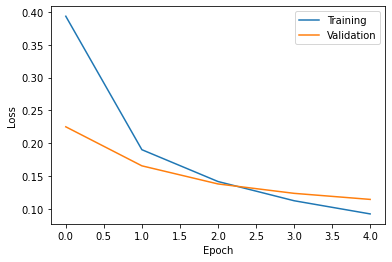

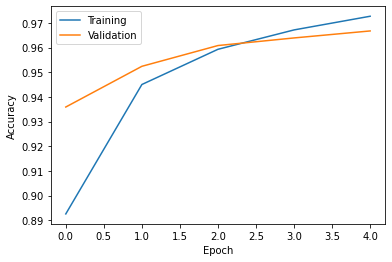

In [18]:
plot_loss(history)
plt.show()
plot_acc(history)
plt.show()

---

### 2.2.5 전체 코드

Epoch 1/5
480/480 [==============================] - 2s 5ms/step - loss: 0.3895 - accuracy: 0.8926 - val_loss: 0.2169 - val_accuracy: 0.9393
Epoch 2/5
480/480 [==============================] - 2s 5ms/step - loss: 0.1900 - accuracy: 0.9463 - val_loss: 0.1638 - val_accuracy: 0.9528
Epoch 3/5
480/480 [==============================] - 2s 5ms/step - loss: 0.1431 - accuracy: 0.9585 - val_loss: 0.1367 - val_accuracy: 0.9614
Epoch 4/5
480/480 [==============================] - 2s 5ms/step - loss: 0.1131 - accuracy: 0.9674 - val_loss: 0.1218 - val_accuracy: 0.9645
Epoch 5/5
100/100 [==============================] - 0s 3ms/step - loss: 0.1004 - accuracy: 0.9704
Test Loss and Accuracy -> [0.10043905675411224, 0.9703999757766724]


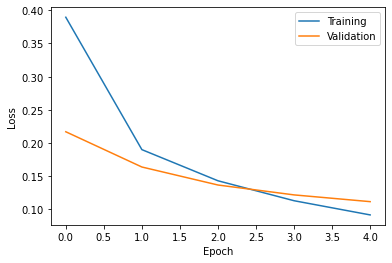

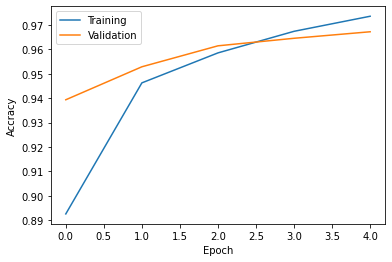

In [19]:
# file: ex2_1_ann_mnist_cl.py

# 1.분류 ANN을 위한 인공지능 모델 구현
from keras import layers, models

# 2. 분산 방식 모델링을 포함하는 함수형 구현 
def ANN_models_func(Nin, Nh, Nout):
    x = layers.Input(shape=(Nin,))
    h = layers.Activation('relu')(layers.Dense(Nh)(x))
    y = layers.Activation('softmax')(layers.Dense(Nout)(h))
    model = models.Model(x, y)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 3. # 연쇄 방식 모델링을 포함하는 함수형 구현
def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    model.add(layers.Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    return model

# 4. 분산 방식 모델링을 포함하는 객체지향형 구현
class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = softmax(output(h))

        super().__init__(x, y)
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])

# 5. 연쇄 방식 모델링을 포함하는 객체지향형 구현
class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])

# 6. 분류 ANN에 사용할 데이터 불러오기
import numpy as np
from keras import datasets  # mnist
from keras.utils import np_utils  # to_categorical


def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, H, W = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)


# 7. 분류 ANN 학습 결과 그래프 구현
import matplotlib.pyplot as plt
from keraspp.skeras import plot_loss, plot_acc

# 8. 분류 ANN 학습 및 성능 분석
def main():
    Nin = 784
    Nh = 100
    number_of_class = 10
    Nout = number_of_class

    # model = ANN_models_func(Nin, Nh, Nout)
    # model = ANN_seq_func(Nin, Nh, Nout)
    # model = ANN_models_class(Nin, Nh, Nout)
    model = ANN_seq_class(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()

    history = model.fit(X_train, Y_train, epochs=5, batch_size=100, validation_split=0.2)
    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)

    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()
    
main()